In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

INPUT = '/scratch/users/k21075402/new/commons_harvest__open/'
TRIAL_IDS = ['39596646', '3f82a7f6', 'b484e613', 'd1a59a0e', 'ebcd23ed']

In [3]:
def load_df(trial_id: str, *, num_players: int=None, self_interest: float=None):
    df = pd.read_json(os.path.join(INPUT, trial_id, 'results.json'), lines=True)
    df['reward'] = df.episode_reward.apply(lambda x: np.mean(x))
    df['trial_id'] = trial_id
    assert num_players is None or self_interest is None, 'Can only select based on either num_players or self_interest'
    # df = df[(df['num_players'] == num_players) & (df['self-interest'] == self_interest)]
    if num_players is not None:
        df = df[(df['num_players'] == num_players)]
        df = df.sort_values(by=['self-interest', 'training_iteration'], ascending=[False, True])
        df = df.reset_index(drop=True)
        df['iteration'] = df.index + 1
    elif self_interest is not None:
        df = df[(df['self-interest'] == self_interest)]
        df['iteration'] = df.training_iteration + 300 * (df.num_players - 1)
    
    df = df.drop(columns=['training_iteration', 'episode_reward', 'episode_lengths', 'policy_default_reward'])
    return df

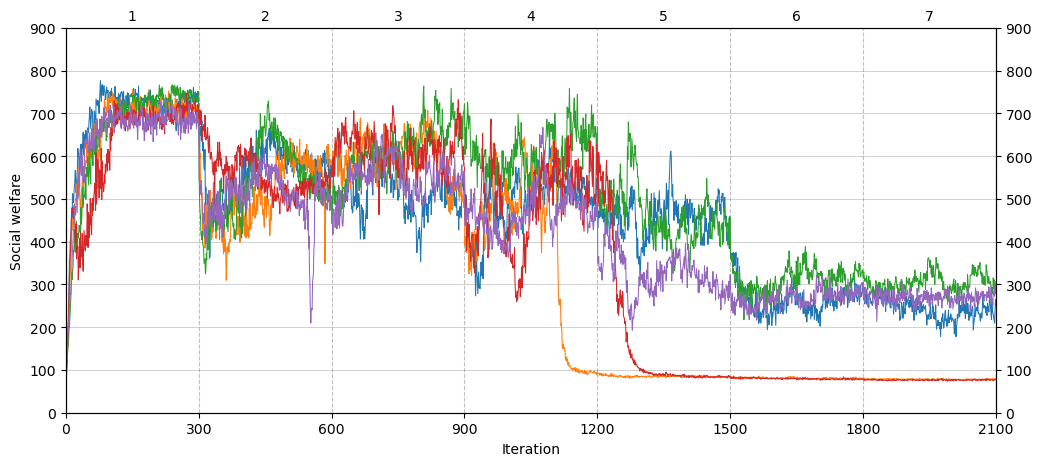

In [4]:
df = pd.concat([load_df(t, self_interest=1) for t in TRIAL_IDS])

grouped = df.groupby('trial_id')

# Plot each group
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
for name, group in grouped:
    group.plot(x='iteration', y='reward', ax=ax, label=name, legend=False, lw=0.75)

# Add legend and labels
# ax.legend(title='Trial ID')
ax.set_xlabel('Iteration')
ax.set_ylabel('Social welfare')
# ax.set_title('WIP')
ax.set_xlim(0, 2100)
ax.set_ylim(0, 900)
ax.set_xticks(np.arange(0, 2101, 300))
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.xaxis.grid(True, color='grey', linestyle='--', alpha=0.5)

ax2 = ax.twinx()
# Synchronize ax2 with ax
ax2.set_ylim(ax.get_ylim())  # Make sure the limits are the same
ax2.set_yticks(ax.get_yticks())  # Duplicate the tick marks
# ax2.set_yticklabels(ax.get_yticklabels())

regions = dict((str(i), i * 300) for i in range(1,8))

for region, position in regions.items():
    # ax.axvline(x=position, color='gray', linestyle='--', alpha=0.5)
    ax.text(position-150, 1.02, region, transform=ax.get_xaxis_transform(), horizontalalignment='center')

fig.savefig('num_players')

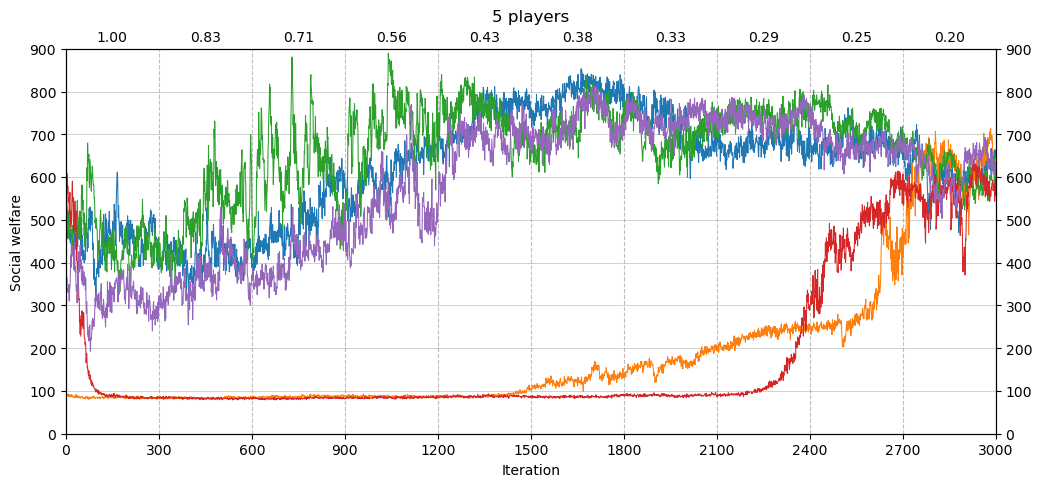

In [5]:
n = 5
# df = load_df('3f82a7f6', num_players=4)
df = pd.concat([load_df(t, num_players=n) for t in TRIAL_IDS])
grouped = df.groupby('trial_id')

# Plot each group
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
for name, group in grouped:
    group.plot(x='iteration', y='reward', ax=ax, label=name, legend=False, lw=0.75)
    
# Add legend and labels
# ax.legend(title='Trial ID')
ax.set_xlabel('Iteration')
ax.set_ylabel('Social welfare')
ax.set_title(f'{n} players', y=1.05)
ax.set_xlim(0, 3000)
ax.set_ylim(0, 900)
ax.set_xticks(np.arange(0, 3001, 300))
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.xaxis.grid(True, color='grey', linestyle='--', alpha=0.5)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())

ratio = [20, 10, 5, 3, 5/2, 2, 5/3, 4/3, 1]
regions = dict((f"{s:.2f}", (1+i) * 300) for i, s in enumerate([1] + [r/(n + r - 1) for r in ratio]))

for region, position in regions.items():
    ax.text(position-150, 1.02, region, transform=ax.get_xaxis_transform(), horizontalalignment='center')

fig.savefig(f'self_interest_{n}')

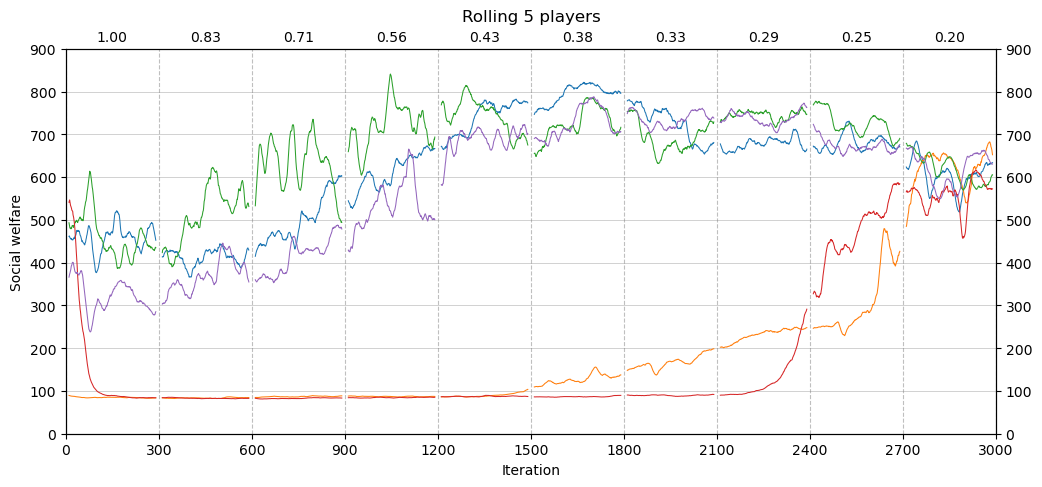

In [6]:
window = 21
epochs = 300
# df = load_df('3f82a7f6', num_players=4)
df = pd.concat([load_df(t, num_players=n) for t in TRIAL_IDS])
grouped = df.groupby('trial_id')

# Plot each group
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
for name, group in grouped:
    result = group['reward'].rolling(window=window, center=True).mean()
    indices = [list(range(epochs*i - window//2 + 1, epochs*i + window//2 +1)) for i in range(1, 10)]
    result.iloc[indices] = np.nan
    result.plot(ax=ax, label=name, legend=False, lw=0.75)
    
# Add legend and labels
# ax.legend(title='Trial ID')
ax.set_xlabel('Iteration')
ax.set_ylabel('Social welfare')
ax.set_title(f'Rolling {n} players', y=1.05)
ax.set_xlim(0, 3000)
ax.set_ylim(0, 900)
ax.set_xticks(np.arange(0, 3001, 300))
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.xaxis.grid(True, color='grey', linestyle='--', alpha=0.5)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())

ratio = [20, 10, 5, 3, 5/2, 2, 5/3, 4/3, 1]
regions = dict((f"{s:.2f}", (1+i) * 300) for i, s in enumerate([1] + [r/(n + r - 1) for r in ratio]))

for region, position in regions.items():
    ax.text(position-150, 1.02, region, transform=ax.get_xaxis_transform(), horizontalalignment='center')

fig.savefig(f'self_interest_{n}_rolling')

In [46]:
df['reward'].rolling(window=5, center=True).mean()

0              NaN
1              NaN
2       367.353333
3       362.326667
4       362.673333
           ...    
2995    631.633333
2996    622.253333
2997    618.240000
2998           NaN
2999           NaN
Name: reward, Length: 15000, dtype: float64

In [52]:
indices = [list(range(epochs*i - window//2 + 1, epochs*i + window//2 +1)) for i in range(1, 10)]
indices

[[296, 297, 298, 299, 300, 301, 302, 303, 304, 305],
 [596, 597, 598, 599, 600, 601, 602, 603, 604, 605],
 [896, 897, 898, 899, 900, 901, 902, 903, 904, 905],
 [1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205],
 [1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505],
 [1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805],
 [2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105],
 [2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405],
 [2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705]]

In [66]:
result[list(range(0,15)) + list(range(290,310))]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5      254.660606
6      251.309091
7      250.551515
8      251.503030
9      251.496970
10     249.787879
11     253.230303
12     256.084848
13     256.636364
14     259.260606
290    285.906061
291    287.703030
292    289.890909
293    289.393939
294    292.448485
295    294.284848
296           NaN
297           NaN
298           NaN
299           NaN
300           NaN
301           NaN
302           NaN
303           NaN
304           NaN
305           NaN
306    292.521212
307    292.163636
308    294.939394
309    300.169697
Name: reward, dtype: float64